##Importing Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Loading the dataset


In [59]:
df = pd.read_csv("Facebook_Marketplace_data.csv")

# Dropping uneccesary columns
df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)

df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

###Exploring status_published

In [60]:
df['status_published'].unique()

# Checking how many types are there

len(df['status_published'].unique())

# There are 6913 unique labels in the status_published variable.
# The total number of rows in the dataset is 7050.
# We can't use this variable so I will drop it.

df.drop(['status_published'], axis = 1, inplace=True)

###Converting status_type (categorical variable) to integer using label encoding

In [61]:
X = df
y = df['status_type']

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_id      7050 non-null   int64
 1   status_type    7050 non-null   int64
 2   num_reactions  7050 non-null   int64
 3   num_comments   7050 non-null   int64
 4   num_shares     7050 non-null   int64
 5   num_likes      7050 non-null   int64
 6   num_loves      7050 non-null   int64
 7   num_wows       7050 non-null   int64
 8   num_hahas      7050 non-null   int64
 9   num_sads       7050 non-null   int64
 10  num_angrys     7050 non-null   int64
dtypes: int64(11)
memory usage: 606.0 KB


In [62]:
X.head()

# Successfully converted categorical variable

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,3,529,512,262,432,92,3,1,1,0
1,2,1,150,0,0,150,0,0,0,0,0
2,3,3,227,236,57,204,21,1,1,0,0
3,4,1,111,0,0,111,0,0,0,0,0
4,5,1,213,0,0,204,9,0,0,0,0


###Feature scaling

In [63]:
cols = X.columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [67]:
X = pd.DataFrame(X, columns=[cols])
X.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.000000,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.000142,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000284,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.000426,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000567,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


###Elbow Method


In [68]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  # fit function
  kmeans.fit(X)
  # Compute  WCSS values
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

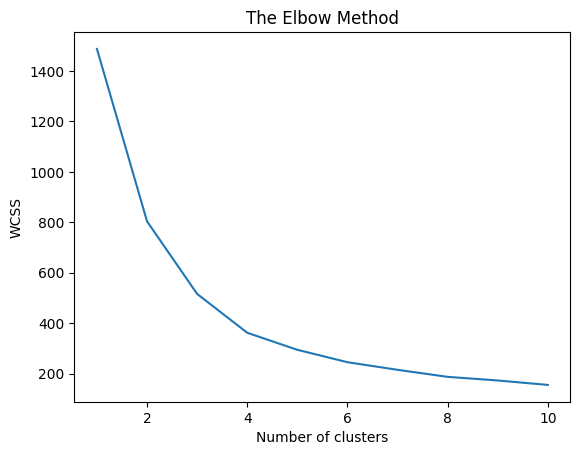

In [69]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# The curve is flattening at 4 therefore we will use 4 clusters

###K-Means model with 4 clusters


In [73]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

y = kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###Visualising clusters

KeyError: 'Key length (2) exceeds index depth (1)'